## Problem Set 2
### Natalia Allmi
### Matriculation No: 03755024

### Problem 3

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
import warnings
warnings.filterwarnings("ignore")

#### Read Data

In [3]:
df = pd.read_csv("Data-Problem-3.csv", skiprows=[1])

In [4]:
df.head()

,Location-1,Location-2,Location-3,Location-1.1,Location-2.1,Location-3.1
0,1352,2016,2973,90,93,91
1,1119,1777,2627,94,97,93
2,803,1232,1891,96,100,94
3,620,927,1454,99,104,96
4,580,925,1397,98,103,96


#### Data Exploration

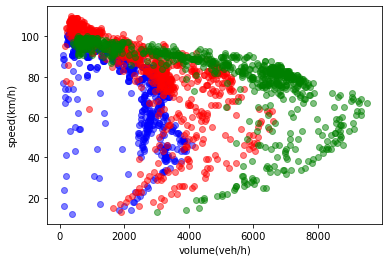

In [5]:
#scatter plot of data
plt.scatter(df['Location-1'], df['Location-1.1'],  c='blue', alpha=0.5)
plt.scatter(df['Location-2'], df['Location-2.1'],  c='red', alpha=0.5)
plt.scatter(df['Location-3'], df['Location-3.1'],  c='green', alpha=0.5)
plt.xlabel('volume(veh/h)')
plt.ylabel('speed(km/h)')
plt.show()

In [6]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Location-1,Location-2,Location-3,Location-1.1,Location-2.1,Location-3.1
Location-1,1.000000,0.776613,0.863752,-0.588814,-0.651608,-0.580831
Location-2,0.776613,1.000000,0.917782,-0.664333,-0.643880,-0.573269
Location-3,0.863752,0.917782,1.000000,-0.678157,-0.698130,-0.614364
Location-1.1,-0.588814,-0.664333,-0.678157,1.000000,0.817781,0.793678
Location-2.1,-0.651608,-0.643880,-0.698130,0.817781,1.000000,0.974983
Location-3.1,-0.580831,-0.573269,-0.614364,0.793678,0.974983,1.000000


In [7]:
#One month of historical data .Estimate traffic state at location 3 when its loop detector is absent for a period of 3 days
#The time interval between each two records in the dataset is 60 minutes.

In [8]:
df['hour']=np.arange(1,745,1)
df['day'] = np.ceil(df['hour']/24)

In [9]:
df.head()

,Location-1,Location-2,Location-3,Location-1.1,Location-2.1,Location-3.1,hour,day
0,1352,2016,2973,90,93,91,1,1.0
1,1119,1777,2627,94,97,93,2,1.0
2,803,1232,1891,96,100,94,3,1.0
3,620,927,1454,99,104,96,4,1.0
4,580,925,1397,98,103,96,5,1.0


In [10]:
#separate data in two subsets
#the second subset consists of the last three days. In this case days 29,30,31

df1 = df.iloc[0:672]
df2 = df.iloc[672:744]

#df1 will be used to train and df2 to test
train_x = df1[['Location-1', 'Location-2', 'Location-1.1', 'Location-2.1']].reset_index().drop(["index"], axis=1)
train_y = df1[['Location-3', 'Location-3.1']].reset_index().drop(["index"], axis=1)
test_x = df2[['Location-1', 'Location-2', 'Location-1.1', 'Location-2.1']].reset_index().drop(["index"], axis=1)
test_y = df2[['Location-3', 'Location-3.1']].reset_index().drop(["index"], axis=1)

In [11]:
#normalize the data. 
#The fit is only done with training data and applied to test data because we dont have the test data in real life
scaler = MinMaxScaler()
scaler.fit(train_x) 
train_x_norm = pd.DataFrame(scaler.transform(train_x))
test_x_norm  = pd.DataFrame(scaler.transform(test_x))

scaler.fit(train_y)
train_y_norm = pd.DataFrame(scaler.transform(train_y))
test_y_norm  = pd.DataFrame(scaler.transform(test_y))

#### Build a NN

In [12]:
input_size=train_x_norm.shape[1]
output_size=train_y_norm.shape[1]
models = tf.keras.Sequential([
                             tf.keras.layers.Input(shape=(input_size,)),
                             tf.keras.layers.Dense(input_size, activation="relu"),
                             tf.keras.layers.Dense(output_size, activation='linear')
                            ])
custom_optimizer=tf.keras.optimizers.Adam(learning_rate=0.02)
models.compile(optimizer=custom_optimizer,loss='mean_squared_error')
history = models.fit(train_x_norm,train_y_norm,epochs=50, verbose =1, batch_size=10)


output_train = models.predict_on_batch(train_x_norm)

output_test = models.predict_on_batch(test_x_norm)


Epoch 1/50
68/68 [==============================] - 0s 733us/step - loss: 0.1305
Epoch 2/50
68/68 [==============================] - 0s 737us/step - loss: 0.0495
Epoch 3/50
68/68 [==============================] - 0s 707us/step - loss: 0.0446
Epoch 4/50
68/68 [==============================] - 0s 675us/step - loss: 0.0363
Epoch 5/50
68/68 [==============================] - 0s 707us/step - loss: 0.0118
Epoch 6/50
68/68 [==============================] - 0s 652us/step - loss: 0.0072
Epoch 7/50
68/68 [==============================] - 0s 691us/step - loss: 0.0060
Epoch 8/50
68/68 [==============================] - 0s 703us/step - loss: 0.0055
Epoch 9/50
68/68 [==============================] - 0s 684us/step - loss: 0.0055
Epoch 10/50
68/68 [==============================] - 0s 765us/step - loss: 0.0059
Epoch 11/50
68/68 [==============================] - 0s 1ms/step - loss: 0.0053
Epoch 12/50
68/68 [==============================] - 0s 879us/step - loss: 0.0052
Epoch 13/50
68/68 [========

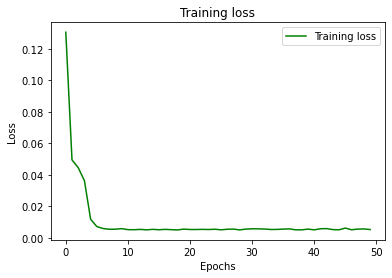

In [13]:
plt.plot(history.epoch, history.history["loss"], 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
#To evaluate the model we scale the data back to its original values.
train_y = scaler.inverse_transform(train_y_norm)
train_y_hat = scaler.inverse_transform(output_train)
test_y = scaler.inverse_transform(test_y_norm)
test_y_hat = scaler.inverse_transform(output_test)

In [15]:

def metrics(train_y, output_train, test_y, output_test):
    print("---TRAIN---")
    MAE_1 =tf.metrics.mean_absolute_error(y_true = train_y[:,0],y_pred = output_train[:,0]).numpy()
    MAE_2 = tf.metrics.mean_absolute_error(y_true =train_y[:,1],y_pred = output_train[:,1]).numpy()
    print("MAE for output 1:", round(MAE_1,3))
    print("MAE for output 2:", round(MAE_2,3))
    print("MAE Avg:", round((MAE_1 + MAE_2)/2,3)) 
    MSE_1 =tf.metrics.mean_squared_error(y_true = train_y[:,0],y_pred = output_train[:,0]).numpy()
    MSE_2 = tf.metrics.mean_squared_error(y_true =train_y[:,1],y_pred = output_train[:,1]).numpy()
    print("MSE for output 1:", round(MSE_1,3))
    print("MSE for output 2:", round(MSE_2,3))
    print("MSE Avg:", round((MSE_1+MSE_2)/2,3))
    MAPE_1 = tf.metrics.mean_absolute_percentage_error(y_true = train_y[:,0],y_pred = output_train[:,0]).numpy()
    MAPE_2 = tf.metrics.mean_absolute_percentage_error(y_true = train_y[:,1],y_pred = output_train[:,1]).numpy()
    print("MAPE for output 1:", round(MAPE_1,3))
    print("MAPE for output 2:", round(MAPE_2,3))
    print("MAPE Avg:", round((MAPE_1+MAPE_2)/2,3))
    
    
    print("---TEST---")
    MAE_1 =tf.metrics.mean_absolute_error(y_true =  test_y[:,0],y_pred = output_test[:,0]).numpy()
    MAE_2 = tf.metrics.mean_absolute_error(y_true = test_y[:,1],y_pred = output_test[:,1]).numpy()
    print("MAE for output 1:", round(MAE_1,3))
    print("MAE for output 2:", round(MAE_2,3))
    print("MAE Avg:", round((MAE_1 + MAE_2)/2,3)) 
    MSE_1 =tf.metrics.mean_squared_error(y_true =  test_y[:,0],y_pred = output_test[:,0]).numpy()
    MSE_2 = tf.metrics.mean_squared_error(y_true = test_y[:,1],y_pred = output_test[:,1]).numpy()
    print("MSE for output 1:", round(MSE_1,3))
    print("MSE for output 2:", round(MSE_2,3))
    print("MSE Avg:", round((MSE_1+MSE_2)/2,3))
    MAPE_1 = tf.metrics.mean_absolute_percentage_error(y_true = test_y[:,0],y_pred = output_test[:,0]).numpy()
    MAPE_2 = tf.metrics.mean_absolute_percentage_error(y_true = test_y[:,1],y_pred = output_test[:,1]).numpy()
    #MAPE_2 = tf.metrics.mean_absolute_percentage_error(y_true = test_y[:,1],y_pred = output_test[:,1].squeeze()).numpy()
    print("MAPE for output 1:", round(MAPE_1,3))
    print("MAPE for output 2:", round(MAPE_2,3))
    print("MAPE Avg:", round((MAPE_1+MAPE_2)/2,3))
    
    range_1 = np.arange(0,10000)
    range_2 = np.arange(0,100)
    
    plt.scatter(train_y[:,0], output_train[:,0],  c='blue', alpha=0.5)
    plt.plot(range_1,range_1, c='red' )
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title('Output 1 Train')
    plt.show()
    

    plt.scatter(train_y[:,1], output_train[:,1],  c='blue', alpha=0.5)
    plt.plot(range_2,range_2, c='red' )
    #plt.plot(np.arange(0,120),np.arange(0,120), c='red' )
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title('Output 2 Train')
    plt.show()
    

    plt.scatter(test_y[:,0], output_test[:,0],  c='blue', alpha=0.5)
    #plt.plot(np.arange(0,10000),np.arange(0,10000), c='red' )
    plt.plot(range_1,range_1, c='red' )
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title('Output 1 Test')
    plt.show()
    

    plt.scatter(test_y[:,1], output_test[:,1],  c='blue', alpha=0.5)
    plt.plot(range_2,range_2, c='red' )
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title('Output 2 Test')
    plt.show()

---TRAIN---
MAE for output 1: 653.159
MAE for output 2: 2.652
MAE Avg: 327.905
MSE for output 1: 667546.5
MSE for output 2: 17.163
MSE Avg: 333781.844
MAPE for output 1: 17.93
MAPE for output 2: 4.592
MAPE Avg: 11.261
---TEST---
MAE for output 1: 792.765
MAE for output 2: 2.54
MAE Avg: 397.652
MSE for output 1: 919041.9
MSE for output 2: 23.909
MSE Avg: 459532.906
MAPE for output 1: 17.749
MAPE for output 2: 3.593
MAPE Avg: 10.671


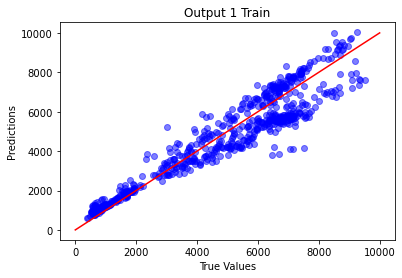

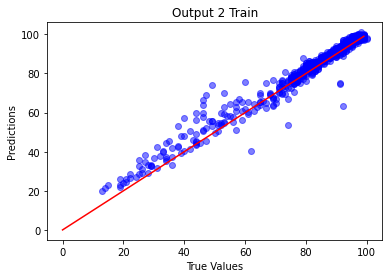

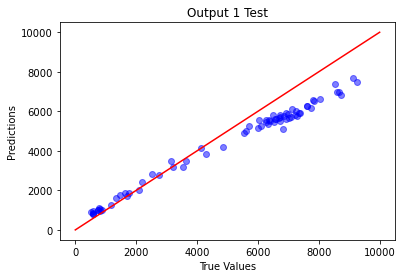

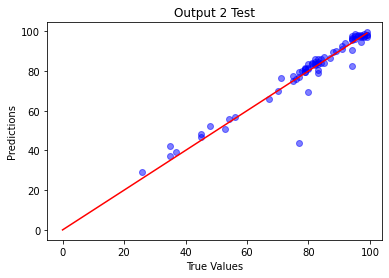

In [16]:
metrics(train_y, train_y_hat, test_y, test_y_hat)

Adjust hyperparameters of the model

In [17]:
#learning rate, number of hidden layers, batch size

In [18]:
learn_rate = [0.1, 0.01, 0.001, 0.0001]
mse_avg_train =[]
mse_avg_test=[]
mae_avg_train =[]
mae_avg_test=[]
mape_avg_train =[]
mape_avg_test=[]

for i in learn_rate:

    input_size=train_x_norm.shape[1]
    output_size=train_y_norm.shape[1]
    models = tf.keras.Sequential([
                                 tf.keras.layers.Input(shape=(input_size,)),
                                 tf.keras.layers.Dense(input_size, activation="relu"),
                                 tf.keras.layers.Dense(output_size, activation='linear')
                                ])
    custom_optimizer=tf.keras.optimizers.Adam(learning_rate=i)
    models.compile(optimizer=custom_optimizer,loss='mean_squared_error')
    history = models.fit(train_x_norm,train_y_norm,epochs=50, verbose =0, batch_size=10)
    
    
    output_train = models.predict_on_batch(train_x_norm)
    
    output_test = models.predict_on_batch(test_x_norm)
    
    
    #To evaluate the model we scale the data back to its original values.
    train_y = scaler.inverse_transform(train_y_norm)
    output_train = scaler.inverse_transform(output_train)
    test_y = scaler.inverse_transform(test_y_norm)
    output_test = scaler.inverse_transform(output_test)

    
    MAE_1 =tf.metrics.mean_absolute_error(y_true = train_y[:,0],y_pred = output_train[:,0]).numpy()
    MAE_2 = tf.metrics.mean_absolute_error(y_true =train_y[:,1],y_pred = output_train[:,1]).numpy()
    mae_avg_train.append(round((MAE_1+MAE_2)/2,3))
    MSE_1 =tf.metrics.mean_squared_error(y_true = train_y[:,0],y_pred = output_train[:,0]).numpy()
    MSE_2 = tf.metrics.mean_squared_error(y_true =train_y[:,1],y_pred = output_train[:,1]).numpy()
    mse_avg_train.append(round((MSE_1+MSE_2)/2,3))
    MAPE_1 = tf.metrics.mean_absolute_percentage_error(y_true = train_y[:,0],y_pred = output_train[:,0]).numpy()
    MAPE_2 = tf.metrics.mean_absolute_percentage_error(y_true = train_y[:,1],y_pred = output_train[:,1]).numpy()
    mape_avg_train.append(round((MAPE_1+MAPE_2)/2,3))
    MAE_1 =tf.metrics.mean_absolute_error(y_true =  test_y[:,0],y_pred = output_test[:,0]).numpy()
    MAE_2 = tf.metrics.mean_absolute_error(y_true = test_y[:,1],y_pred = output_test[:,1]).numpy()
    mae_avg_test.append(round((MAE_1+MAE_2)/2,3))
    MSE_1 =tf.metrics.mean_squared_error(y_true =  test_y[:,0],y_pred = output_test[:,0]).numpy()
    MSE_2 = tf.metrics.mean_squared_error(y_true = test_y[:,1],y_pred = output_test[:,1]).numpy()
    mse_avg_test.append(round((MSE_1+MSE_2)/2,3))
    MAPE_1 = tf.metrics.mean_absolute_percentage_error(y_true = test_y[:,0],y_pred = output_test[:,0]).numpy()
    MAPE_2 = tf.metrics.mean_absolute_percentage_error(y_true = test_y[:,1],y_pred = output_test[:,1]).numpy()
    mape_avg_test.append(round((MAPE_1+MAPE_2)/2,3))
    

df =pd.DataFrame({'Learning Rate':learn_rate, 'MAE_AVG_Train':mae_avg_train, 'MAE_AVG_Test': mae_avg_test,
                       'MSE_AVG_Train':mse_avg_train, 'MSE_AVG_Test':mse_avg_test, 
                       'MAPE_AVG_Train':mape_avg_train,' MAPE_AVG_Test':mape_avg_test})
    

In [19]:
df

,Learning Rate,MAE_AVG_Train,MAE_AVG_Test,MSE_AVG_Train,MSE_AVG_Test,MAPE_AVG_Train,MAPE_AVG_Test
0,0.1000,482.095,571.731,686767.562,856635.938,26.611,25.881
1,0.0100,389.398,258.497,417596.906,168447.109,17.232,14.031
2,0.0010,302.109,334.496,315817.062,376937.000,12.353,11.061
3,0.0001,332.632,293.109,426744.219,356185.656,20.901,16.558


In [20]:
batch_size = [5, 10, 20, 50, 100]
mse_avg_train =[]
mse_avg_test=[]
mae_avg_train =[]
mae_avg_test=[]
mape_avg_train =[]
mape_avg_test=[]

for i in batch_size:

    input_size=train_x_norm.shape[1]
    output_size=train_y_norm.shape[1]
    models = tf.keras.Sequential([
                                 tf.keras.layers.Input(shape=(input_size,)),
                                 tf.keras.layers.Dense(input_size, activation="relu"),
                                 tf.keras.layers.Dense(output_size, activation='linear')
                                ])
    custom_optimizer=tf.keras.optimizers.Adam(learning_rate=0.02)
    models.compile(optimizer=custom_optimizer,loss='mean_squared_error')
    history = models.fit(train_x_norm,train_y_norm,epochs=50, verbose =0, batch_size =i)
    
    
    output_train = models.predict_on_batch(train_x_norm)
    
    output_test = models.predict_on_batch(test_x_norm)
    
    
    #To evaluate the model we scale the data back to its original values.
    train_y = scaler.inverse_transform(train_y_norm)
    output_train = scaler.inverse_transform(output_train)
    test_y = scaler.inverse_transform(test_y_norm)
    output_test = scaler.inverse_transform(output_test)

    
    MAE_1 =tf.metrics.mean_absolute_error(y_true = train_y[:,0],y_pred = output_train[:,0]).numpy()
    MAE_2 = tf.metrics.mean_absolute_error(y_true =train_y[:,1],y_pred = output_train[:,1]).numpy()
    mae_avg_train.append(round((MAE_1+MAE_2)/2,3))
    MSE_1 =tf.metrics.mean_squared_error(y_true = train_y[:,0],y_pred = output_train[:,0]).numpy()
    MSE_2 = tf.metrics.mean_squared_error(y_true =train_y[:,1],y_pred = output_train[:,1]).numpy()
    mse_avg_train.append(round((MSE_1+MSE_2)/2,3))
    MAPE_1 = tf.metrics.mean_absolute_percentage_error(y_true = train_y[:,0],y_pred = output_train[:,0]).numpy()
    MAPE_2 = tf.metrics.mean_absolute_percentage_error(y_true = train_y[:,1],y_pred = output_train[:,1]).numpy()
    mape_avg_train.append(round((MAPE_1+MAPE_2)/2,3))
    MAE_1 =tf.metrics.mean_absolute_error(y_true =  test_y[:,0],y_pred = output_test[:,0]).numpy()
    MAE_2 = tf.metrics.mean_absolute_error(y_true = test_y[:,1],y_pred = output_test[:,1]).numpy()
    mae_avg_test.append(round((MAE_1+MAE_2)/2,3))
    MSE_1 =tf.metrics.mean_squared_error(y_true =  test_y[:,0],y_pred = output_test[:,0]).numpy()
    MSE_2 = tf.metrics.mean_squared_error(y_true = test_y[:,1],y_pred = output_test[:,1]).numpy()
    mse_avg_test.append(round((MSE_1+MSE_2)/2,3))
    MAPE_1 = tf.metrics.mean_absolute_percentage_error(y_true = test_y[:,0],y_pred = output_test[:,0]).numpy()
    MAPE_2 = tf.metrics.mean_absolute_percentage_error(y_true = test_y[:,1],y_pred = output_test[:,1]).numpy()
    mape_avg_test.append(round((MAPE_1+MAPE_2)/2,3))
    

df =pd.DataFrame({'Batch Size':batch_size, 'MAE_AVG_Train':mae_avg_train, 'MAE_AVG_Test': mae_avg_test,
                       'MSE_AVG_Train':mse_avg_train, 'MSE_AVG_Test':mse_avg_test, 
                       'MAPE_AVG_Train':mape_avg_train,' MAPE_AVG_Test':mape_avg_test})
    

In [21]:
df

,Batch Size,MAE_AVG_Train,MAE_AVG_Test,MSE_AVG_Train,MSE_AVG_Test,MAPE_AVG_Train,MAPE_AVG_Test
0,5,316.661,382.290,304328.750,413940.125,13.548,14.206
1,10,353.182,304.970,337427.188,239338.828,14.242,11.861
2,20,231.857,208.104,207365.562,189217.672,7.839,6.182
3,50,333.622,310.293,319993.312,266497.562,11.792,9.721
4,100,1117.783,1277.455,3227548.500,3828648.000,77.488,79.626


In [22]:
hidden_layers = [[tf.keras.layers.Input(shape=(input_size,)),tf.keras.layers.Dense(input_size, activation="relu"),
 tf.keras.layers.Dense(output_size, activation='linear')], 
                [tf.keras.layers.Input(shape=(input_size,)),tf.keras.layers.Dense(input_size, activation="relu"),
 tf.keras.layers.Dense(input_size, activation="relu"),tf.keras.layers.Dense(output_size, activation='linear')],
                [tf.keras.layers.Input(shape=(input_size,)),tf.keras.layers.Dense(input_size, activation="relu"),
 tf.keras.layers.Dense(input_size, activation="relu"),tf.keras.layers.Dense(input_size, activation="relu"),
                 tf.keras.layers.Dense(output_size, activation='linear')]]

mse_avg_train =[]
mse_avg_test=[]
mae_avg_train =[]
mae_avg_test=[]
mape_avg_train =[]
mape_avg_test=[]

for i in hidden_layers:

    input_size=train_x_norm.shape[1]
    output_size=train_y_norm.shape[1]
    models = tf.keras.Sequential(i)
    custom_optimizer=tf.keras.optimizers.Adam(learning_rate=0.02)
    models.compile(optimizer=custom_optimizer,loss='mean_squared_error')
    history = models.fit(train_x_norm,train_y_norm,epochs=50, verbose =0, batch_size =10)
    
    
    output_train = models.predict_on_batch(train_x_norm)
    
    output_test = models.predict_on_batch(test_x_norm)
    
    
    #To evaluate the model we scale the data back to its original values.
    train_y = scaler.inverse_transform(train_y_norm)
    output_train = scaler.inverse_transform(output_train)
    test_y = scaler.inverse_transform(test_y_norm)
    output_test = scaler.inverse_transform(output_test)

    
    MAE_1 =tf.metrics.mean_absolute_error(y_true = train_y[:,0],y_pred = output_train[:,0]).numpy()
    MAE_2 = tf.metrics.mean_absolute_error(y_true =train_y[:,1],y_pred = output_train[:,1]).numpy()
    mae_avg_train.append(round((MAE_1+MAE_2)/2,3))
    MSE_1 =tf.metrics.mean_squared_error(y_true = train_y[:,0],y_pred = output_train[:,0]).numpy()
    MSE_2 = tf.metrics.mean_squared_error(y_true =train_y[:,1],y_pred = output_train[:,1]).numpy()
    mse_avg_train.append(round((MSE_1+MSE_2)/2,3))
    MAPE_1 = tf.metrics.mean_absolute_percentage_error(y_true = train_y[:,0],y_pred = output_train[:,0]).numpy()
    MAPE_2 = tf.metrics.mean_absolute_percentage_error(y_true = train_y[:,1],y_pred = output_train[:,1]).numpy()
    mape_avg_train.append(round((MAPE_1+MAPE_2)/2,3))
    MAE_1 =tf.metrics.mean_absolute_error(y_true =  test_y[:,0],y_pred = output_test[:,0]).numpy()
    MAE_2 = tf.metrics.mean_absolute_error(y_true = test_y[:,1],y_pred = output_test[:,1]).numpy()
    mae_avg_test.append(round((MAE_1+MAE_2)/2,3))
    MSE_1 =tf.metrics.mean_squared_error(y_true =  test_y[:,0],y_pred = output_test[:,0]).numpy()
    MSE_2 = tf.metrics.mean_squared_error(y_true = test_y[:,1],y_pred = output_test[:,1]).numpy()
    mse_avg_test.append(round((MSE_1+MSE_2)/2,3))
    MAPE_1 = tf.metrics.mean_absolute_percentage_error(y_true = test_y[:,0],y_pred = output_test[:,0]).numpy()
    MAPE_2 = tf.metrics.mean_absolute_percentage_error(y_true = test_y[:,1],y_pred = output_test[:,1]).numpy()
    mape_avg_test.append(round((MAPE_1+MAPE_2)/2,3))
    

df =pd.DataFrame({'Hidden Layers':[1,2,3], 'MAE_AVG_Train':mae_avg_train, 'MAE_AVG_Test': mae_avg_test,
                       'MSE_AVG_Train':mse_avg_train, 'MSE_AVG_Test':mse_avg_test, 
                       'MAPE_AVG_Train':mape_avg_train,' MAPE_AVG_Test':mape_avg_test})
    

In [23]:
df

,Hidden Layers,MAE_AVG_Train,MAE_AVG_Test,MSE_AVG_Train,MSE_AVG_Test,MAPE_AVG_Train,MAPE_AVG_Test
0,1,444.125,423.454,630441.750,492874.375,30.300,27.564
1,2,249.806,180.438,242990.312,120659.578,10.670,8.902
2,3,1138.342,1312.687,3261100.750,3959900.500,74.361,76.602


### Problem 4

#### Import Libraries

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, f1_score, 
    roc_auc_score,
    ConfusionMatrixDisplay,
    PrecisionRecallDisplay, 
    RocCurveDisplay,
    recall_score
)
from sklearn.metrics import confusion_matrix
import datetime
from imblearn.under_sampling import NearMiss
from collections import Counter

#### Read Data

In [25]:
df = pd.read_csv('accidents_2012_to_2014.csv')

#### 1.Explore and visualize the data to identify possible influencing factors, and perform data preprocessing as needed. 

In [26]:
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,201201BS70001,527200,178760,-0.169101,51.493429,1,3,2,1,19/01/2012,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002821,2012
1,201201BS70002,524930,181430,-0.200838,51.517931,1,3,2,1,04/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01004760,2012
2,201201BS70003,525860,178080,-0.188636,51.487618,1,3,2,1,10/01/2012,...,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002893,2012
3,201201BS70004,524980,181030,-0.200259,51.514325,1,3,1,1,18/01/2012,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002886,2012
4,201201BS70005,526170,179200,-0.183773,51.497614,1,3,1,1,17/01/2012,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002890,2012


In [27]:
df.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')

Target Variable: 'Accident_Severity'

Variables that are discarded from being influencing factors:

-Accident_Index: this is a unique index

-Year: I keep day of the week and time with I think provides more information

-Date: I keep day of the week and time with I think provides more information

-1st_Road_Number: unclear from reference what it represents

-2nd_Road_Number: unclear from reference what it represents

-Location_Easting_OSGR : For location I use lat and long 

-Location_Northing_OSGR: For location I use lat and long 

-'LSOA_of_Accident_Location': For location I use lat and long 


Variables that can influence the problem:
 'Longitude', 'Latitude', 'Police_Force',
'Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week',
'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
'1st_Road_Class', 'Road_Type', 'Speed_limit',
'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
 'Pedestrian_Crossing-Human_Control',
'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
'Weather_Conditions', 'Road_Surface_Conditions',
'Special_Conditions_at_Site', 'Carriageway_Hazards',
'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident'

In [28]:
df1 = df[['Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
'Number_of_Vehicles', 'Number_of_Casualties', 'Day_of_Week',
'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
'1st_Road_Class', 'Road_Type', 'Speed_limit',
'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
 'Pedestrian_Crossing-Human_Control',
'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
'Weather_Conditions', 'Road_Surface_Conditions',
'Special_Conditions_at_Site', 'Carriageway_Hazards',
'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident']]

###### Handle missing data

In [29]:
#check for nan values in df
df1.isna().sum()

Longitude                                           0
Latitude                                            0
Police_Force                                        0
Accident_Severity                                   0
Number_of_Vehicles                                  0
Number_of_Casualties                                0
Day_of_Week                                         0
Time                                               13
Local_Authority_(District)                          0
Local_Authority_(Highway)                           0
1st_Road_Class                                      0
Road_Type                                           0
Speed_limit                                         0
Junction_Detail                                464697
Junction_Control                               178610
2nd_Road_Class                                      0
Pedestrian_Crossing-Human_Control                   0
Pedestrian_Crossing-Physical_Facilities             0
Light_Conditions            

The missing data has to be filled or dropped. 
Junction_Detail has all entries as NaN, so I discard using this variable

In [30]:
df1.drop(['Junction_Detail'], axis = 1, inplace = True)

[array(['Authorised person', 'Automatic traffic signal',
       'Giveway or uncontrolled', 'Stop Sign'], dtype=object)]


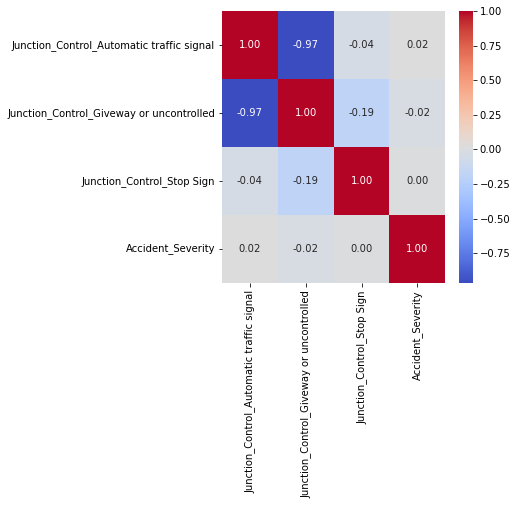

In [31]:
#To check whether Junction_Control can be an interesting value to keep, I create a sub dataframe with only Accident Severity
#and Junction_control values that are not nan.
aux = df1[['Accident_Severity', 'Junction_Control']].dropna()

#then I perform one-hot econding on Junction_Control
onehot_encoder = OneHotEncoder(drop='first', sparse=False)
cat_array = onehot_encoder.fit_transform(aux[['Junction_Control']])
print(onehot_encoder.categories_)

onehot_cat_features= ['Junction_Control_Automatic traffic signal','Junction_Control_Giveway or uncontrolled', 
                      'Junction_Control_Stop Sign']
cat_df = pd.DataFrame(cat_array, columns=onehot_cat_features).astype(np.uint8)
cat_df.head()

aux = pd.concat([aux.reset_index(drop=True), cat_df.reset_index(drop=True)], axis= 1)

#look at correlation between target and junction control
plt.figure(figsize=(5, 5))
sns.heatmap(aux[onehot_cat_features+ ['Accident_Severity']].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

From this we can see Junction_Control has almost no correlation with accident_Severity. 
Therefore I drop this feature from the set.

In [32]:
df1.drop(['Junction_Control'], axis = 1, inplace = True)

In [33]:
#regarding the rest of the null values, because they only consitute 0.16% of the dataset I drop these rows
print(round((df1.shape[0] - df1.dropna().shape[0])*100/df1.shape[0],2), '%')

0.17 %


In [34]:
df1.dropna(inplace=True)
df1.reset_index(drop=True, inplace=True)

In [35]:
df1.isna().sum()

Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
Road_Type                                      0
Speed_limit                                    0
2nd_Road_Class                                 0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-Physical_Facilities        0
Light_Conditions                               0
Weather_Conditions                             0
Road_Surface_Conditions                        0
Special_Conditions_at_Site                     0
Carriageway_Hazards 

###### Visualization

In [36]:
#convert time to datetime format

time = []
for i in range(0,len(df1['Time'])):
    dt = datetime.datetime.strptime(df1['Time'][i], '%H:%M')
    time.append(dt)


In [37]:
df1['Time'] = time

In [38]:
#categorical features
cat_feat= ['Police_Force','Day_of_Week','Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', 'Road_Type', '2nd_Road_Class','Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident','Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions','Speed_limit']

#ccontinuous features
cont_feat = ['Number_of_Vehicles', 'Number_of_Casualties', 'Time' ]
location = ['Longitude', 'Latitude']

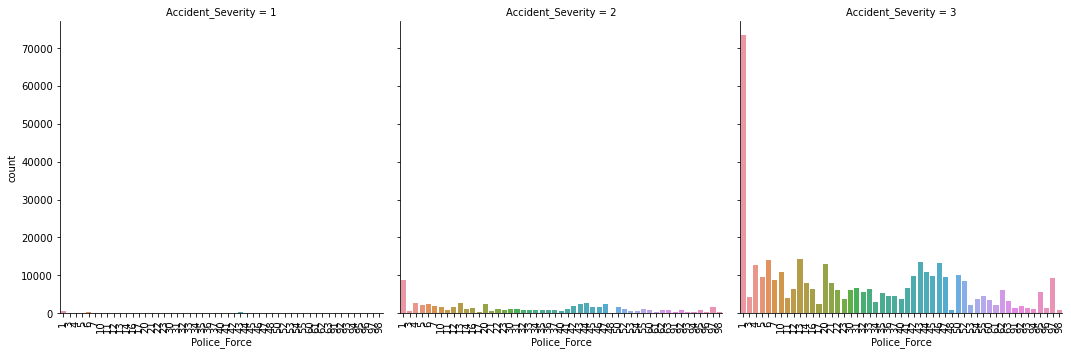

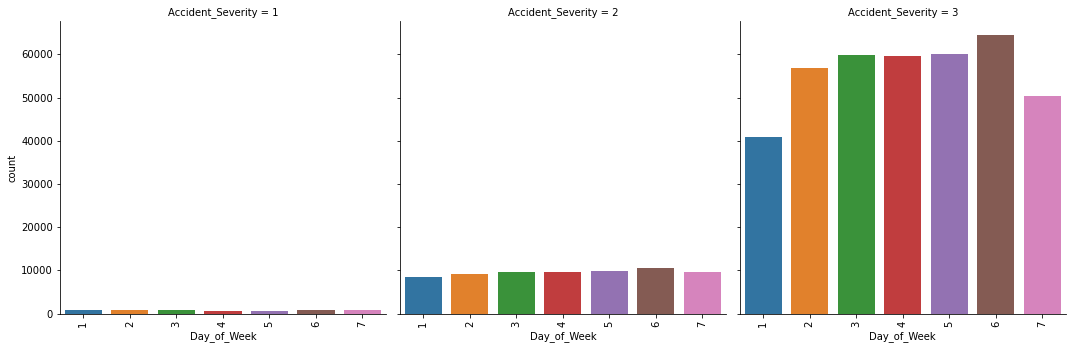

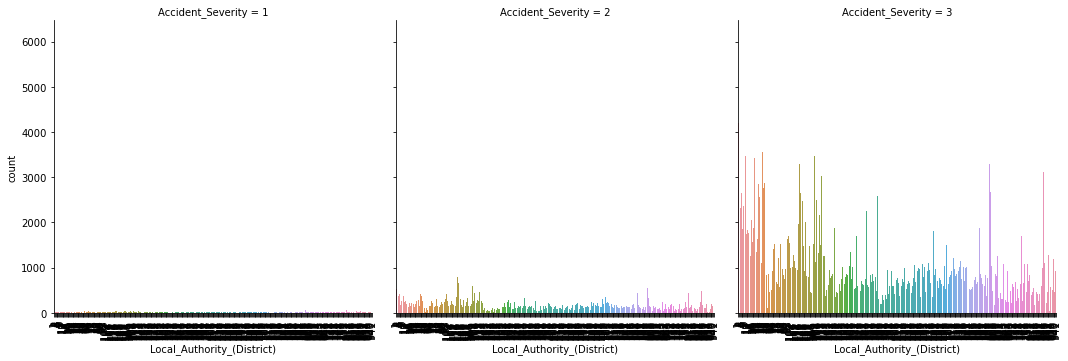

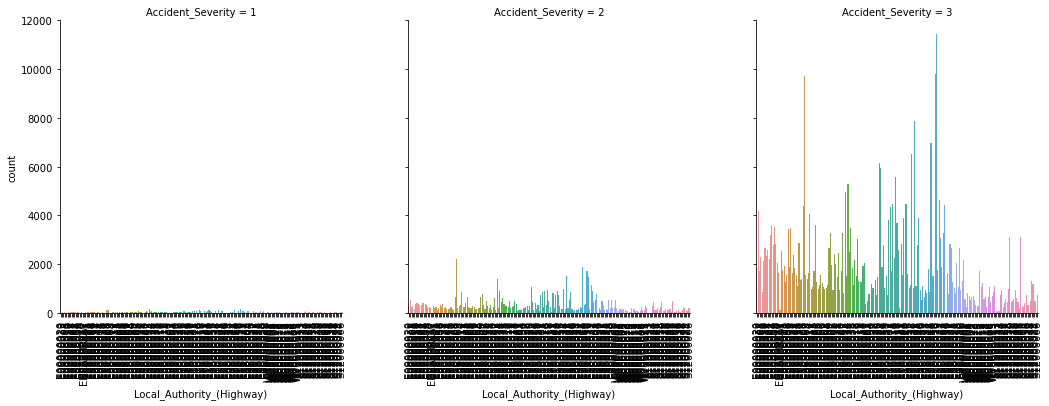

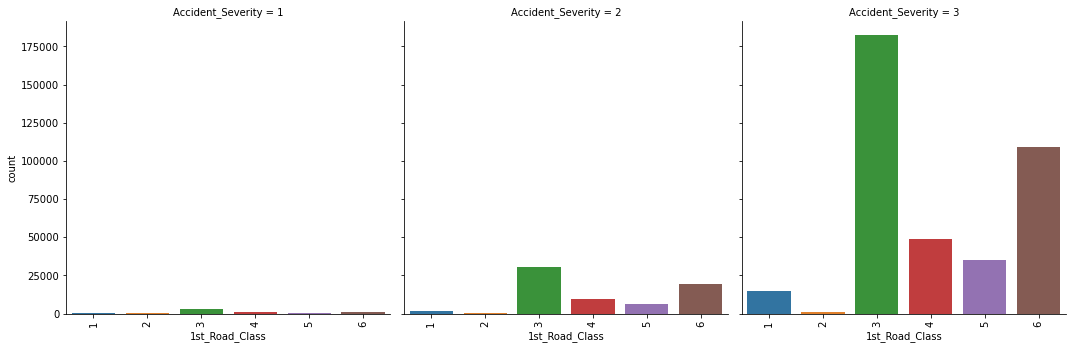

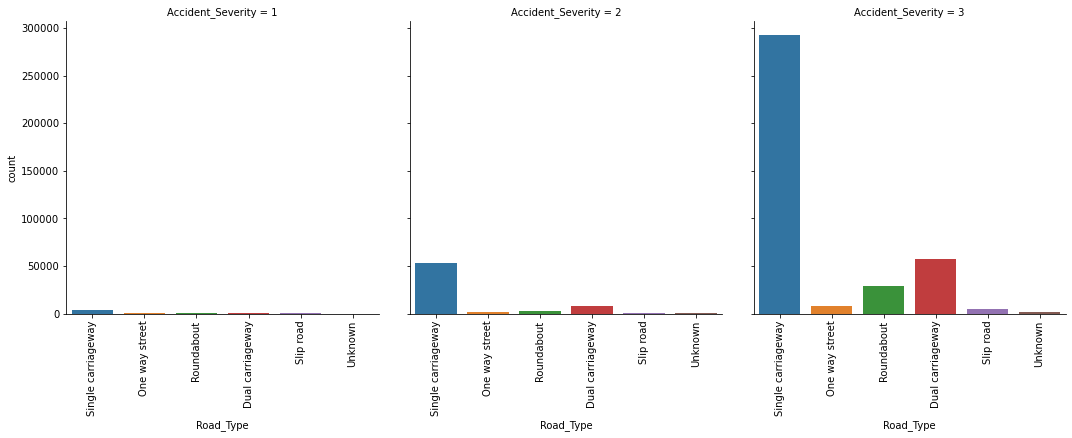

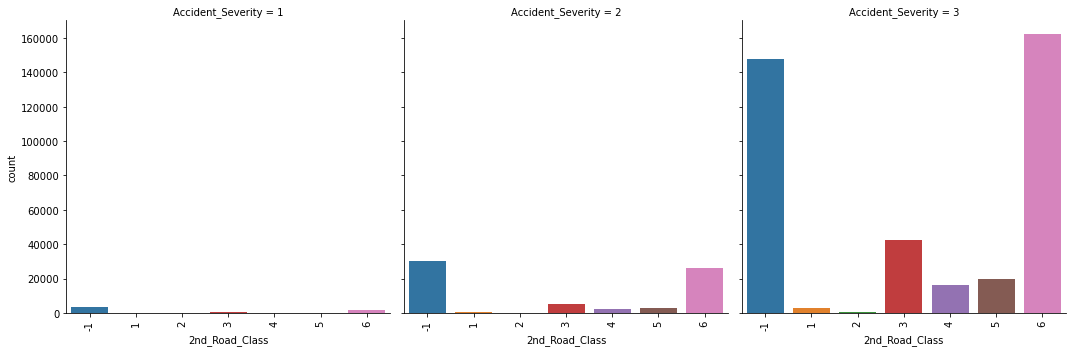

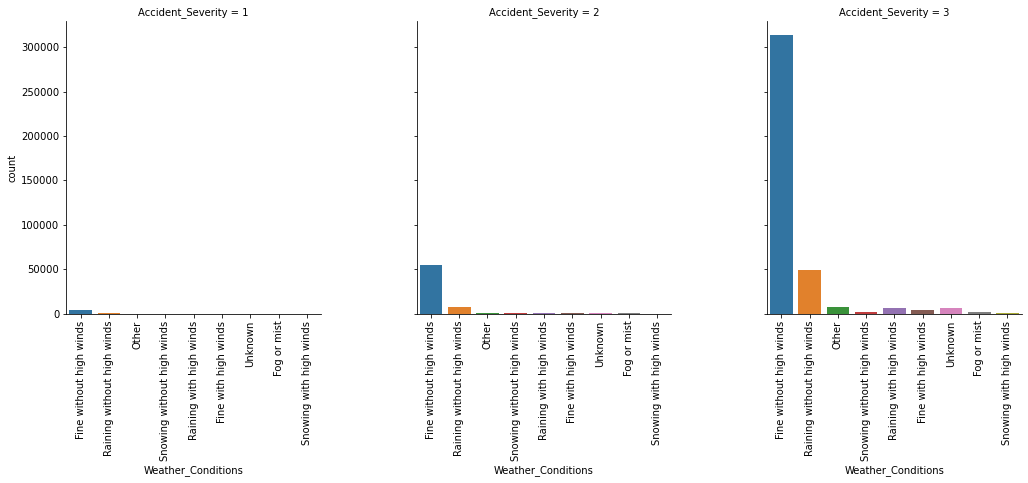

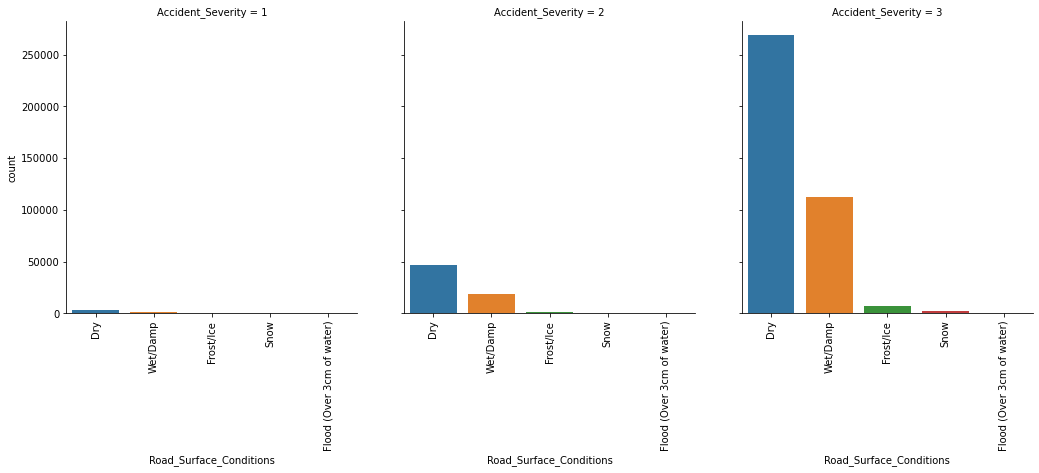

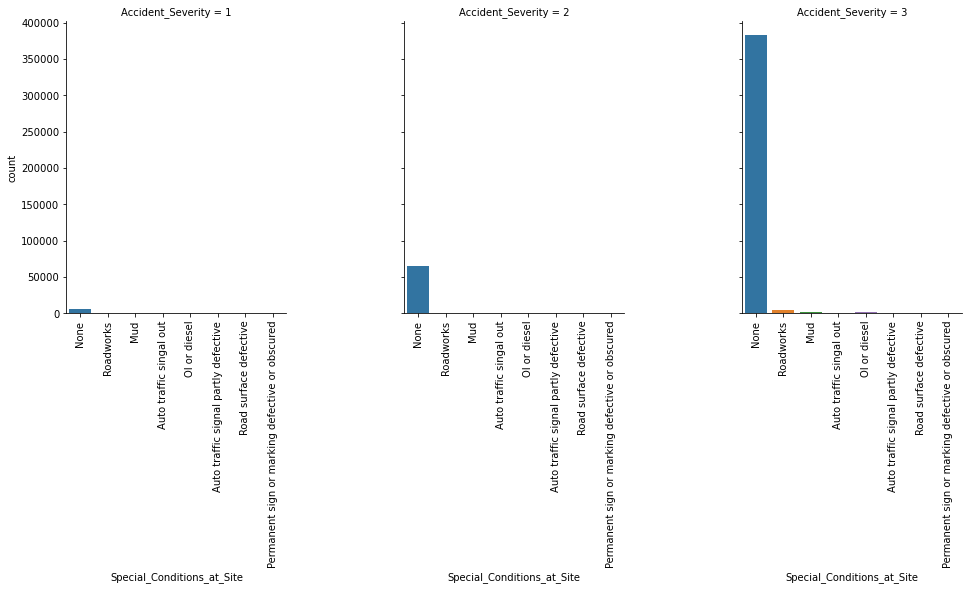

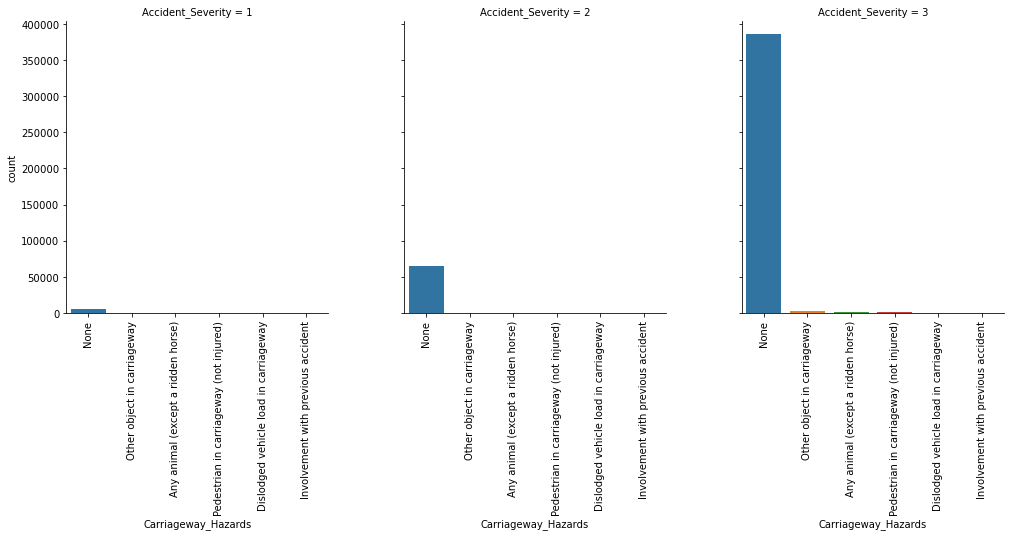

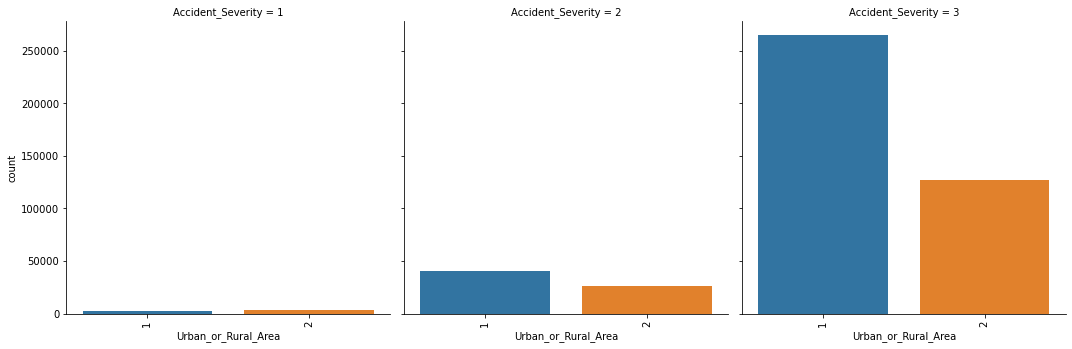

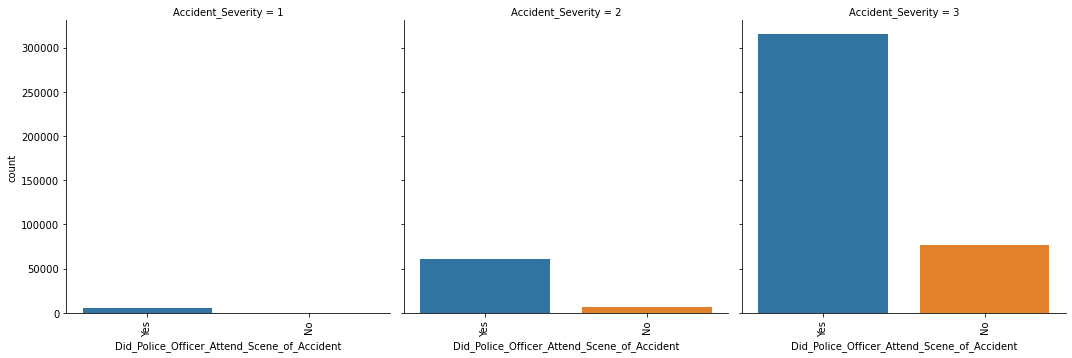

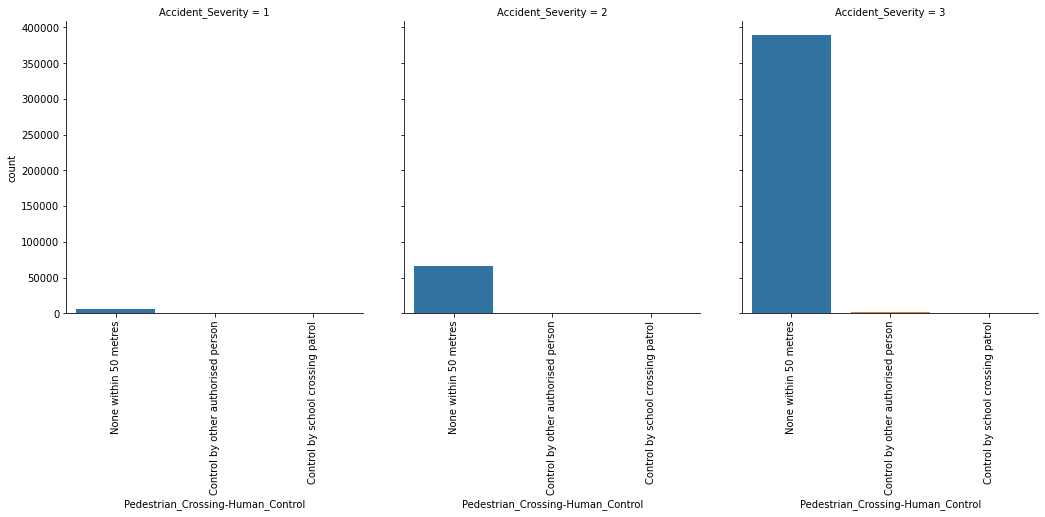

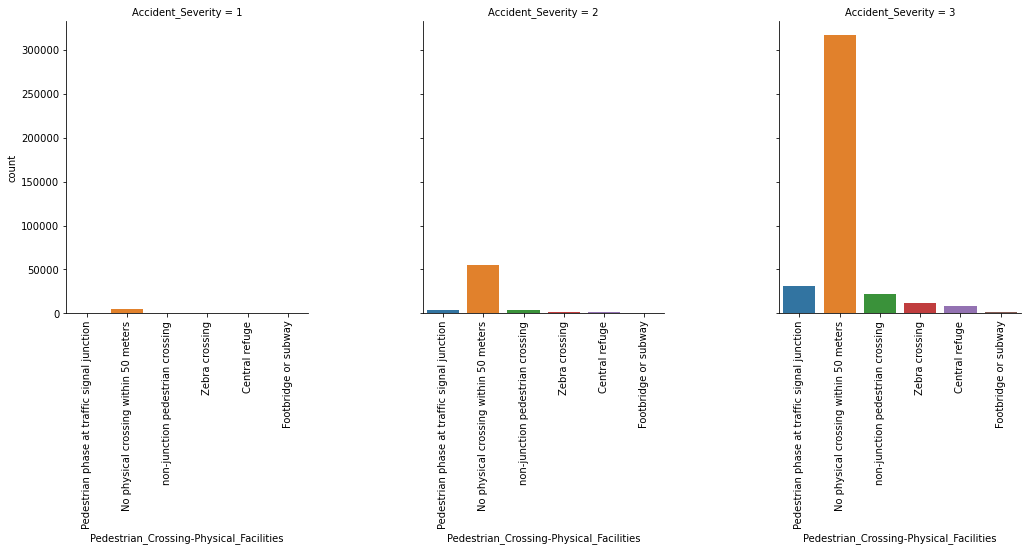

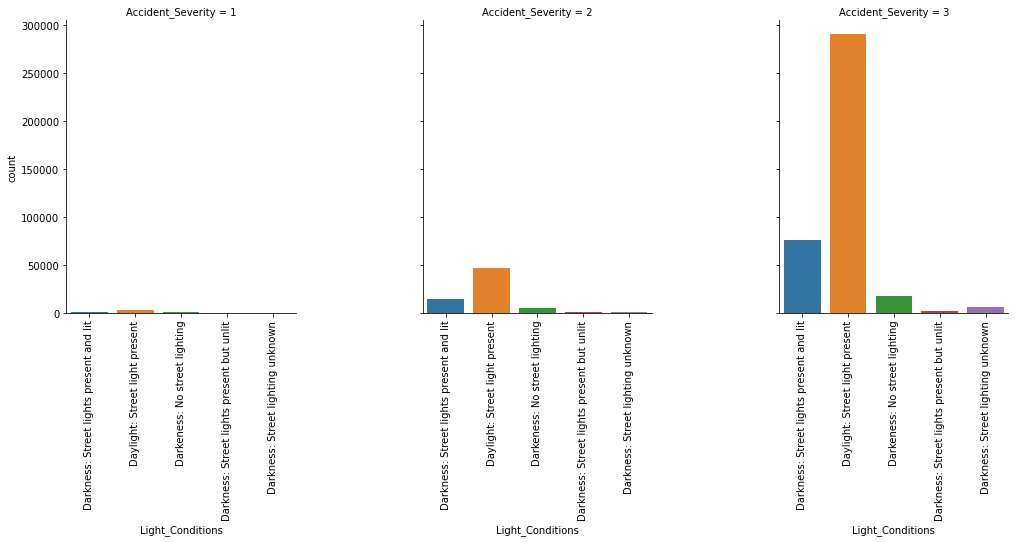

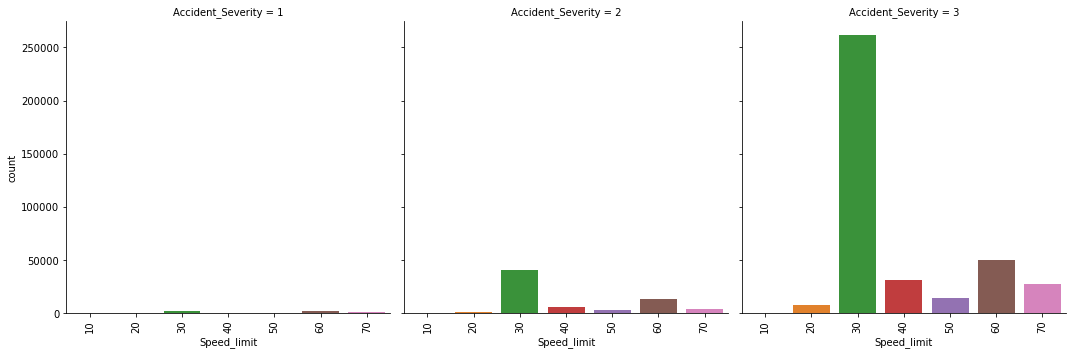

In [39]:
for feature in cat_feat:
    sns.catplot(data=df1, x=feature, col='Accident_Severity', kind='count',aspect=1,height=5).set_xticklabels(rotation=90)
    plt.show()
    

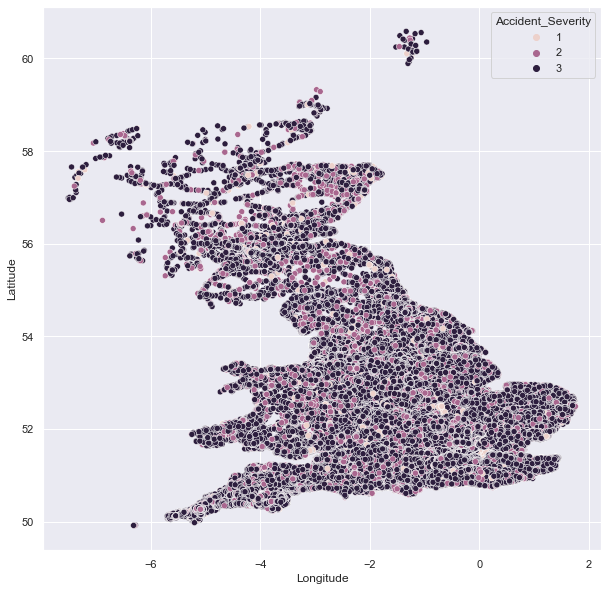

In [40]:
sns.set(rc={"figure.figsize":(10, 10)})
sns.scatterplot(data=df1, x="Longitude", y="Latitude", hue="Accident_Severity")
plt.show()

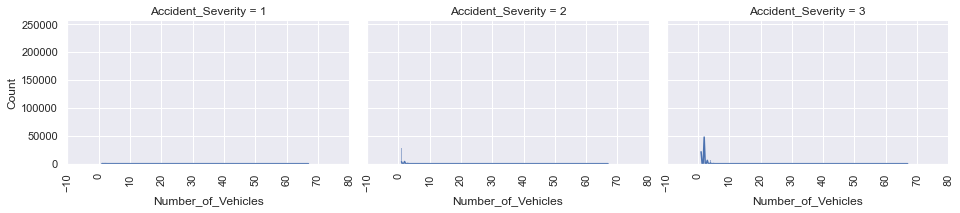

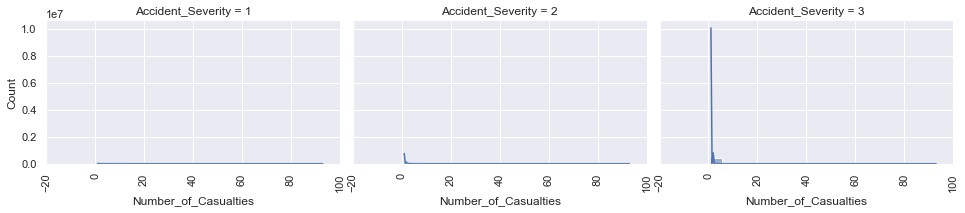

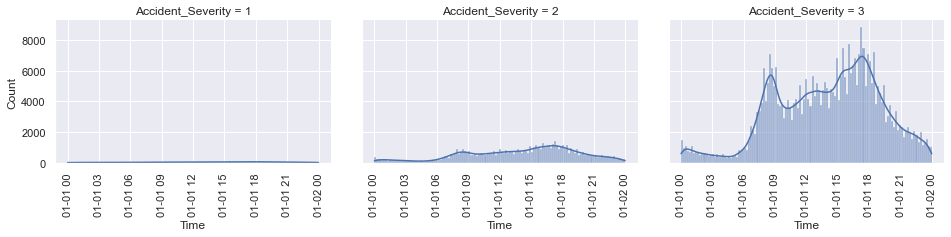

In [41]:
#plot continous features
for feature in cont_feat:
    sns.displot(data=df1, x=feature, col='Accident_Severity', kde=True, aspect=1.5, height=3).set_xticklabels(rotation=90)
    plt.show()

In [42]:

#encoding of variable time according to previous plot
df1['Time_cat'] = np.nan
df1.loc[(df1['Time'] >= '1900-01-01 00:01:00') & (df1['Time'] < '1900-01-01 03:01:00'), 'Time_cat'] = 1
df1.loc[(df1['Time'] >= '1900-01-01 03:01:00') & (df1['Time'] < '1900-01-01 06:01:00'), 'Time_cat'] = 2
df1.loc[(df1['Time'] >= '1900-01-01 06:01:00') & (df1['Time'] < '1900-01-01 09:01:00'), 'Time_cat'] = 3
df1.loc[(df1['Time'] >= '1900-01-01 09:01:00') & (df1['Time'] < '1900-01-01 12:01:00'), 'Time_cat'] = 4
df1.loc[(df1['Time'] >= '1900-01-01 12:01:00') & (df1['Time'] < '1900-01-01 15:01:00'), 'Time_cat'] = 5
df1.loc[(df1['Time'] >= '1900-01-01 15:01:00') & (df1['Time'] < '1900-01-01 18:01:00'), 'Time_cat'] = 6
df1.loc[(df1['Time'] >= '1900-01-01 18:01:00') & (df1['Time'] < '1900-01-01 21:01:00'), 'Time_cat'] = 7
df1.loc[(df1['Time'] >= '1900-01-01 21:01:00') & (df1['Time'] <= '1900-01-01 23:59:00'), 'Time_cat'] = 8

##### Encoding

Tree models dont require normalizations.
For LGBM: It can directly process cat features. One-hot encoding not necessary.

In [43]:
# label_encoder object 
label_encoder = preprocessing.LabelEncoder()
# Encode cat features that don't have numerical values
df1['Local_Authority_(Highway)']= label_encoder.fit_transform(df1['Local_Authority_(Highway)'])
df1['Road_Type']= label_encoder.fit_transform(df1['Road_Type'])
df1['Weather_Conditions']= label_encoder.fit_transform(df1['Weather_Conditions'])
df1['Road_Surface_Conditions']= label_encoder.fit_transform(df1['Road_Surface_Conditions'])
df1['Special_Conditions_at_Site']= label_encoder.fit_transform(df1['Special_Conditions_at_Site'])
df1['Carriageway_Hazards']= label_encoder.fit_transform(df1['Carriageway_Hazards'])
df1['Did_Police_Officer_Attend_Scene_of_Accident']= label_encoder.fit_transform(df1['Did_Police_Officer_Attend_Scene_of_Accident'])
df1['Pedestrian_Crossing-Human_Control']= label_encoder.fit_transform(df1['Pedestrian_Crossing-Human_Control'])
df1['Pedestrian_Crossing-Physical_Facilities']= label_encoder.fit_transform(df1['Pedestrian_Crossing-Physical_Facilities'])
df1['Light_Conditions']= label_encoder.fit_transform(df1['Light_Conditions'])

##### Target Variable

In [44]:
df1['Accident_Severity'].value_counts()

3    391940
2     66689
1      5297
Name: Accident_Severity, dtype: int64

In [45]:
print("The percentage of samples with Accident_Severity 3 is:",round(df1['Accident_Severity'].value_counts().values[0]*100/df1.shape[0]),"%")
print("The percentage of samples with Accident_Severity 2 is:",round(df1['Accident_Severity'].value_counts().values[1]*100/df1.shape[0]),"%")
print("The percentage of samples with Accident_Severity 1 is:",round(df1['Accident_Severity'].value_counts().values[2]*100/df1.shape[0]),"%")

The percentage of samples with Accident_Severity 3 is: 84 %
The percentage of samples with Accident_Severity 2 is: 14 %
The percentage of samples with Accident_Severity 1 is: 1 %


The target variable is not balanced, meaning if we use accuracy to evaluate the model it will just predict all accident_severity as 3 and have an accuracy of 84%. Therefore we have to use the f1 metric to evaluate performance. 

#### 2. Build a statistical learning model to predict the accident severity using the identified features. Then, train and evaluate the model using appropriate strategies, where appropriate metrics need to be selected to measure its performance

In [46]:
#classification report
def classification_metrics_report(y_train, y_test, 
                                  yhat_train, yhat_test):
    accuracy_score_train = accuracy_score(y_train, yhat_train) * 100
    accuracy_score_test = accuracy_score(y_test, yhat_test) * 100
    
    print('===Accuracy score===')
    print(f'Train: {accuracy_score_train:.1f}\nTest: {accuracy_score_test:.1f}')
    
    f1_score_train = f1_score(y_train, yhat_train, average='macro') #takes the average of each class’s F-1 score:
    f1_score_test = f1_score(y_test, yhat_test, average='macro')
    
    print('===F1 score===')
    print(f'Train: {f1_score_train:.2f}\nTest: {f1_score_test:.2f}')
    
    recall_score_train = recall_score(y_train, yhat_train, average='macro') #takes the average of each class’s F-1 score:
    recall_score_test =  recall_score(y_test, yhat_test, average='macro')
    
    print('===Recall===')
    print(f'Train: {recall_score_train:.2f}\nTest: {recall_score_test:.2f}')
    
    
    ############################################################################
    
    print('===Confusion matrix===')
    cm = confusion_matrix(y_train, yhat_train)
    cm_df = pd.DataFrame(cm,
                     index = ['1','2','3'], 
                     columns = ['1','2','3'])
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True)
    plt.title('Confusion Matrix Train')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()
    
    cm = confusion_matrix(y_test, yhat_test)
    cm_df = pd.DataFrame(cm,
                     index = ['1','2','3'], 
                     columns = ['1','2','3'])
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True)
    plt.title('Confusion Matrix Test')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()

##### LGBM

In [47]:
#categorical features
cat_feat= ['Police_Force','Day_of_Week','Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', 'Road_Type', '2nd_Road_Class','Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident','Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions','Speed_limit', 'Time_cat']

#ccontinuous features
cont_feat = ['Number_of_Vehicles', 'Number_of_Casualties']
location = ['Longitude', 'Latitude']

===Accuracy score===
Train: 85.4
Test: 84.5
===F1 score===
Train: 0.43
Test: 0.33
===Recall===
Train: 0.40
Test: 0.34
===Confusion matrix===


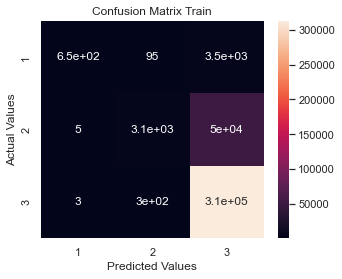

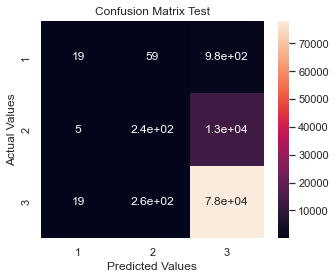

In [48]:
X = df1[cat_feat + cont_feat + location]
y = df1['Accident_Severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



lgb_model = lgb.LGBMClassifier(
    objective='multiclass',
    n_estimators=500,
    learning_rate=0.1,
    num_leaves=128,
    max_depth=7,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=0.001,
    random_state=42,
    n_jobs=-1
    )

lgb_model.fit(X_train, y_train, eval_metric='logloss')

yhat_train = lgb_model.predict(X_train)
yhat_test = lgb_model.predict(X_test)

classification_metrics_report(y_train, y_test, yhat_train, yhat_test)

===Accuracy score===
Train: 67.6
Test: 63.2
===F1 score===
Train: 0.47
Test: 0.39
===Recall===
Train: 0.76
Test: 0.51
===Confusion matrix===


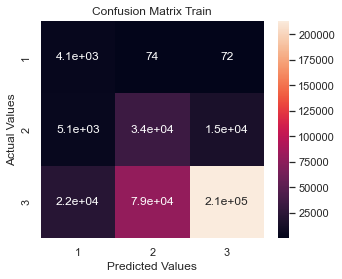

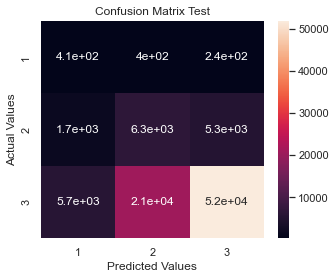

In [49]:
X = df1[cat_feat + cont_feat + location]
y = df1['Accident_Severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

weights = {1:(1/(y_train.value_counts().values[2]/y_train.shape[0])), 
           2:(1/(y_train.value_counts().values[1]/y_train.shape[0])), 
           3:(1/(y_train.value_counts().values[0]/y_train.shape[0]))}

lgb_model = lgb.LGBMClassifier(
    objective='multiclass',
    n_estimators=500,
    learning_rate=0.1,
    num_leaves=128,
    max_depth=7,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=0.001,
    random_state=42,
    n_jobs=-1,
    class_weight = weights
    )

lgb_model.fit(X_train, y_train, eval_metric='logloss')

yhat_train = lgb_model.predict(X_train)
yhat_test = lgb_model.predict(X_test)

classification_metrics_report(y_train, y_test, yhat_train, yhat_test)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

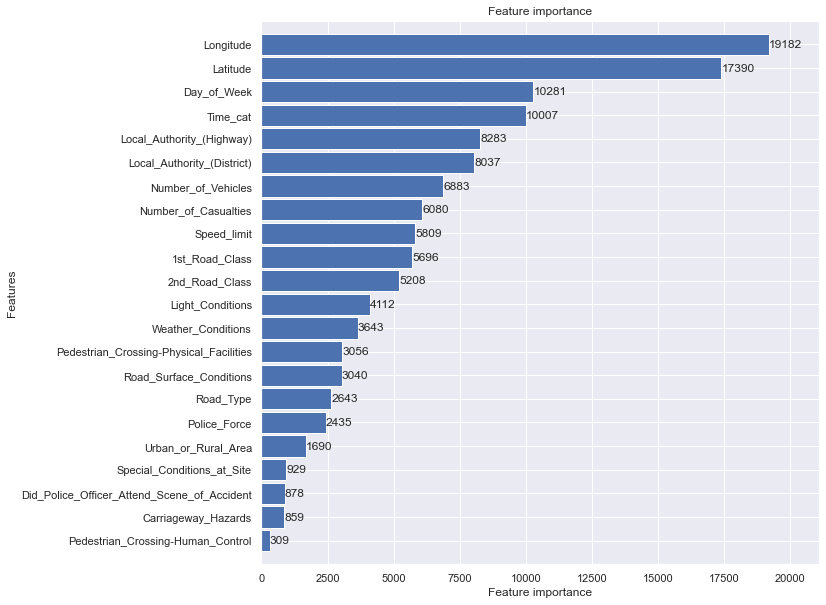

In [50]:
lgb.plot_importance(lgb_model, max_num_features = 60, height=.9)

===Accuracy score===
Train: 65.8
Test: 61.4
===F1 score===
Train: 0.46
Test: 0.38
===Recall===
Train: 0.74
Test: 0.49
===Confusion matrix===


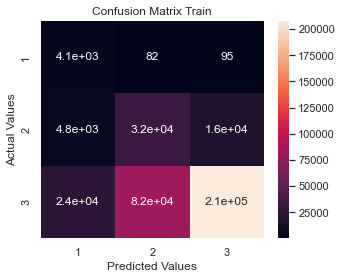

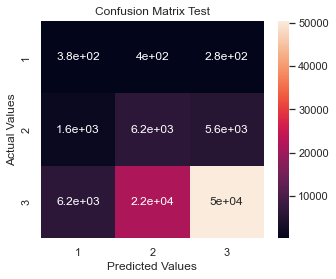

In [51]:
#model with features that have importance over 5000
X = df1[ location + ['Time_cat', 'Day_of_Week', 'Local_Authority_(Highway)', 'Local_Authority_(District)', 
                     'Number_of_Vehicles', 'Number_of_Casualties', 'Speed_limit', '2nd_Road_Class', '1st_Road_Class']]
y = df1['Accident_Severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

weights = {1:(1/(y_train.value_counts().values[2]/y_train.shape[0])), 
           2:(1/(y_train.value_counts().values[1]/y_train.shape[0])), 
           3:(1/(y_train.value_counts().values[0]/y_train.shape[0]))}

lgb_model = lgb.LGBMClassifier(
    objective='multiclass',
    n_estimators=500,
    learning_rate=0.1,
    num_leaves=128,
    max_depth=7,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=0.001,
    random_state=42,
    n_jobs=-1,
    #class_weight ={1:.70, 2:.25 , 3:.05}
    class_weight = weights
    )

lgb_model.fit(X_train, y_train, eval_metric='logloss')

yhat_train = lgb_model.predict(X_train)
yhat_test = lgb_model.predict(X_test)

classification_metrics_report(y_train, y_test, yhat_train, yhat_test)

Although class weights is in someways equivalent to applyin ogver/under- sampling techniques, because they are different processes we try one to see the results.

##### NearMiss Undersampling

In [52]:
# define the undersampling method
undersample = NearMiss(version=1, n_neighbors=3)

# transform the dataset
X = df1[ location + ['Time_cat', 'Day_of_Week', 'Local_Authority_(Highway)', 'Local_Authority_(District)', 
                     'Number_of_Vehicles', 'Number_of_Casualties', 'Speed_limit', '2nd_Road_Class', '1st_Road_Class']]
y = df1['Accident_Severity']
X, y = undersample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)


Counter({1: 5297, 2: 5297, 3: 5297})


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [54]:
y_train.value_counts()

3    4282
1    4254
2    4176
Name: Accident_Severity, dtype: int64

In [55]:
y_test.value_counts()

2    1121
1    1043
3    1015
Name: Accident_Severity, dtype: int64

===Accuracy score===
Train: 93.2
Test: 71.7
===F1 score===
Train: 0.93
Test: 0.72
===Recall===
Train: 0.93
Test: 0.72
===Confusion matrix===


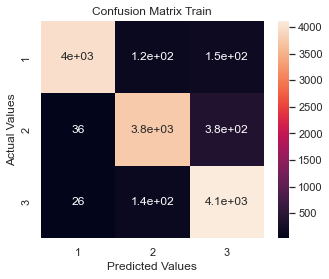

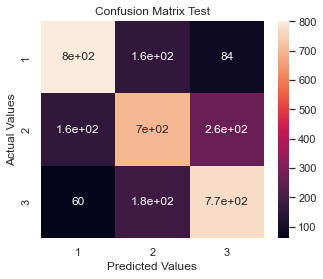

In [56]:

lgb_model = lgb.LGBMClassifier(
    objective='multiclass',
    n_estimators=500,
    learning_rate=0.1,
    num_leaves=128,
    max_depth=7,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_lambda=0.001,
    random_state=42,
    n_jobs=-1
    )

lgb_model.fit(X_train, y_train, eval_metric='logloss')

yhat_train = lgb_model.predict(X_train)
yhat_test = lgb_model.predict(X_test)

classification_metrics_report(y_train, y_test, yhat_train, yhat_test)